# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData (1).csv


In [ ]:
import io

dataset = pd.read_csv(io.BytesIO(uploaded['SeoulBikeData.csv']),encoding= 'unicode_escape')


In [ ]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **Exploratory data analysis**

Before running any model for predictions we must ensure that the dataset doesn't have any missing or null values.

Determine which features are categorical and how to make them numerical because they cannot be used as is for a predictive model.

Check the skewness of the features. Normal distribution works best for predictive models and some variables might require transformation.

Check feature correlation. The first model I intend to test is Linear regression. It operates on the assumption that the features are independent of each other otherwise the results will be skewed.  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Observations**

We can see that there no missing data in the dataset. There are 13 variables and the dependent variable is **Rented Bike Count**.
From the datatype we can also infer which features are categorical - 


*   Date
*   Seasons
*   Holiday
*   Functioning Day

Based on these observations we split the dataset into two datasets, one for numerical features and another for categorical features


In [ ]:
numeric_features = dataset.describe().columns
dataset_num = dataset[numeric_features]
categorical_features = dataset.describe(include=['object','category']).columns
dataset_cat = dataset[categorical_features]

In [ ]:
dataset_cat.describe(include='all')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,25/09/2018,Spring,No Holiday,Yes
freq,24,2208,8328,8465


In [ ]:
dataset_num.describe(include='all')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#**Numerical features analysis**

We can compare the mean and median(50%) get a basic idea about the skewness of the data. The closer they are in value the less skewed the data.
We will further examine the data using boxplot graphs below.*italicised text*

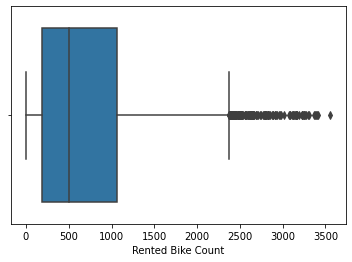

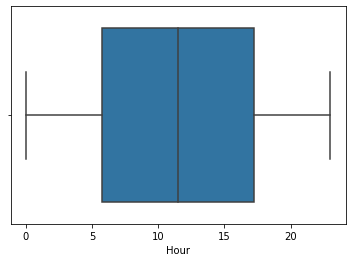

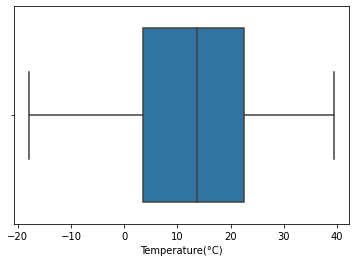

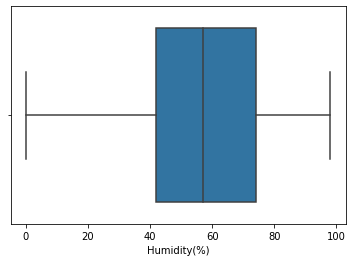

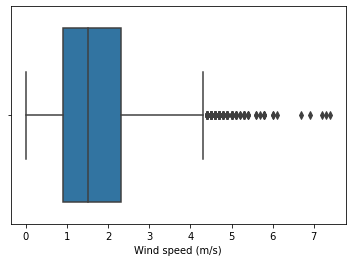

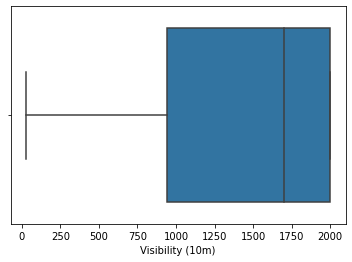

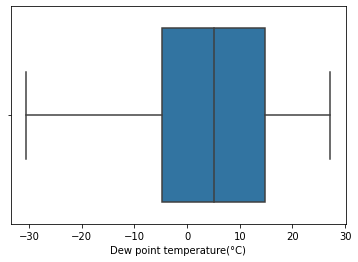

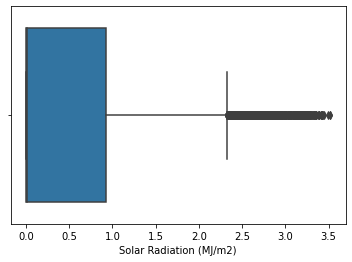

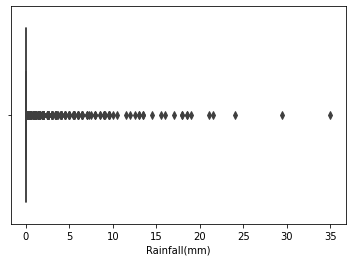

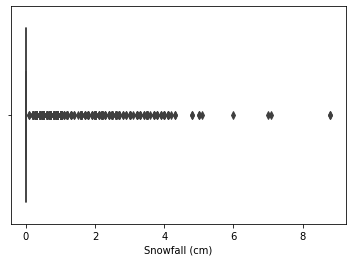

In [ ]:
i=0
for name in numeric_features:
    i=i+1
    sns.boxplot(name,data=dataset_num) 
    plt.show()
plt.show()

**Conclusion from boxplot graphs**

We can determine the skewness from the position of the box, the line that divides it, the values beyond its tail end.

* Rented Bike Count - The dependent variable. It is skewed right and has many outliers. Our priority should be to transform it to make it less skewed.

* Windspeed - It is skewed right and has many outliers. We should transform it to make it less skewed.

* Visibilty - It is skewed left and requires transformation

* Solar Radiation - It is skewed right and has many outliers. We should transform it to make it less skewed.

* Rainfall and Snowfall - For both cases, The data is concentrated on 0. This implies the majority of the data is zero which renders transformation useless.
A possible solution is to treat it as categorical data. Further analyis is required



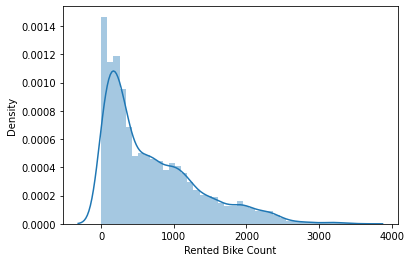

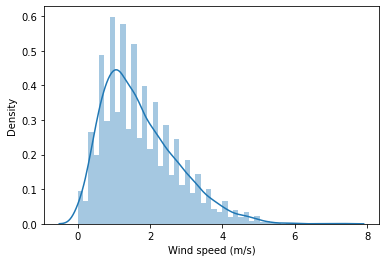

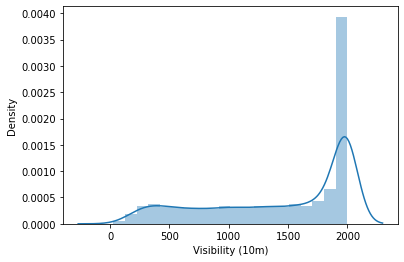

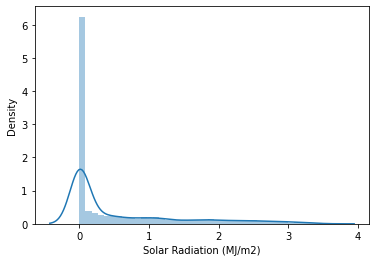

In [ ]:
# Further analysis of skewed data
sns.distplot(dataset['Rented Bike Count'])
plt.show()
sns.distplot(dataset['Wind speed (m/s)'])
plt.show()
sns.distplot(dataset['Visibility (10m)'])
plt.show()
sns.distplot(dataset['Solar Radiation (MJ/m2)'])
plt.show()

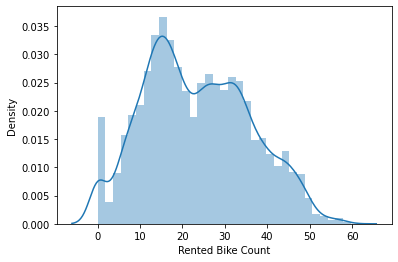

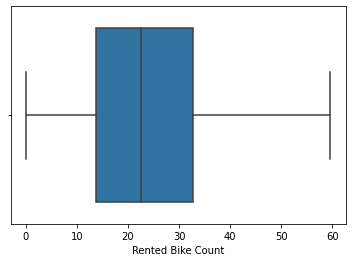

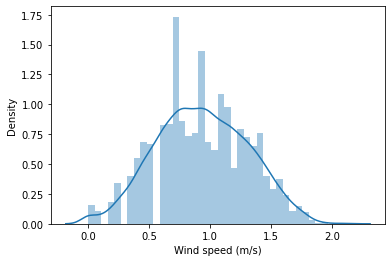

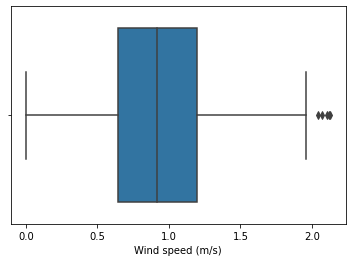

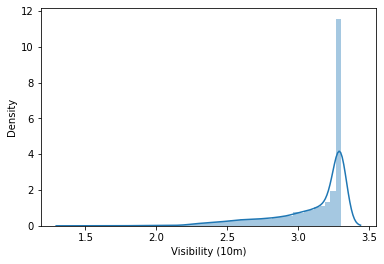

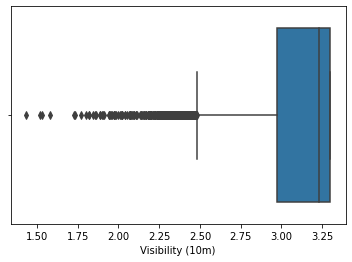

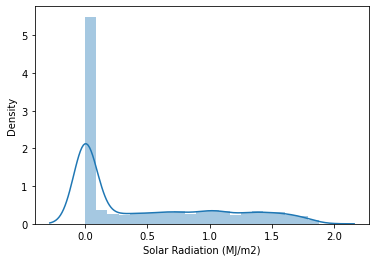

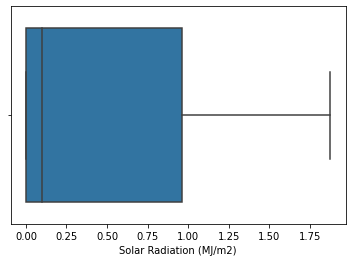

In [ ]:
#Applying Transfromations to make data more balanced
sns.distplot(np.sqrt(dataset['Rented Bike Count']))
plt.show()
sns.boxplot('Rented Bike Count',data=np.sqrt(dataset_num))
plt.show()
sns.distplot(np.log1p(dataset['Wind speed (m/s)']))
plt.show()
sns.boxplot('Wind speed (m/s)',data=np.log1p(dataset_num))
plt.show()
sns.distplot(np.log10(dataset['Visibility (10m)']))
plt.show()
sns.boxplot('Visibility (10m)',data=np.log10(dataset_num))
plt.show()
sns.distplot(np.sqrt(dataset['Solar Radiation (MJ/m2)']))
plt.show()
sns.boxplot('Solar Radiation (MJ/m2)',data=np.sqrt(dataset_num))
plt.show()


**Observation**

The transformation was successful on Rented Bike Count and WindSpeed. This will improve the accuracy of the model.
However the same cannot be said for Solar Radiation and visibilty. Most of the data is concentrated in a single value for both the features. So a potential solution would be simply make both binary and treat them as categorical data.

In [ ]:
#Updating dataset_num with the transformed values
dataset_num['Rented Bike Count']= np.sqrt(dataset['Rented Bike Count'])
dataset_num['Wind speed (m/s)']= np.log1p(dataset['Wind speed (m/s)'])


dataset_num.describe(include='all')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,23.443395,11.500000,12.882922,58.226256,0.932933,1436.825799,4.073813,0.569111,0.148687,0.075068
std,12.450984,6.922582,11.944825,20.362413,0.373541,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,13.820275,5.750000,3.500000,42.000000,0.641854,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,22.461075,11.500000,13.700000,57.000000,0.916291,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,32.638167,17.250000,22.500000,74.000000,1.193922,2000.000000,14.800000,0.930000,0.000000,0.000000
max,59.632206,23.000000,39.400000,98.000000,2.128232,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#Updating the categorical features
dataset_cat[['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Visibility (10m)']] = dataset[['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Visibility (10m)']]
dataset_num.drop(['Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Visibility (10m)'],axis=1,inplace=True)
dataset_cat.head()

,Date,Seasons,Holiday,Functioning Day,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m)
0,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000
1,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000
2,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000
3,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000
4,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000


In [ ]:
#Checking numerical features
numeric_features = dataset_num.columns
categorical_features = dataset_cat.columns
dataset_num.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C)
0,15.937377,0,-5.2,37,1.163151,-17.6
1,14.282857,1,-5.5,38,0.587787,-17.6
2,13.152946,2,-6.0,39,0.693147,-17.7
3,10.344080,3,-6.2,40,0.641854,-17.6
4,8.831761,4,-6.0,36,1.193922,-18.6


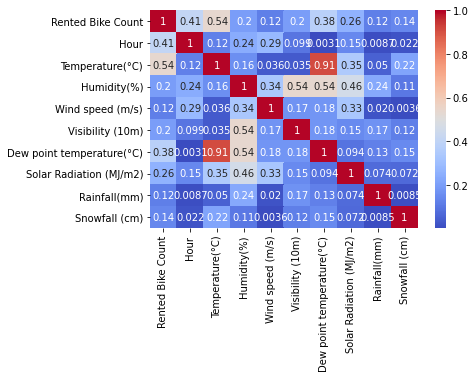

In [ ]:
#Checking for collinearity in the features
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

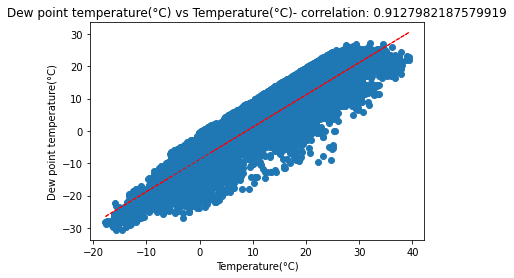

In [ ]:
#Compare Temperature and Dew Point Temperature
fig = plt.figure()
ax = fig.gca()
feature = dataset_num['Temperature(°C)']
label = dataset_num['Dew point temperature(°C)']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Temperature(°C)')
plt.ylabel('Dew point temperature(°C)')
ax.set_title('Dew point temperature(°C) vs ' + 'Temperature(°C)' + '- correlation: ' + str(correlation))
z = np.polyfit(dataset['Temperature(°C)'], dataset['Dew point temperature(°C)'], 1)
y_hat = np.poly1d(z)(dataset['Temperature(°C)'])

plt.plot(dataset['Temperature(°C)'], y_hat, "r--", lw=1)

plt.show()

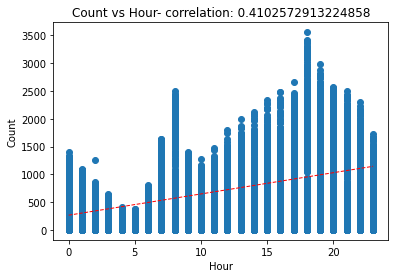

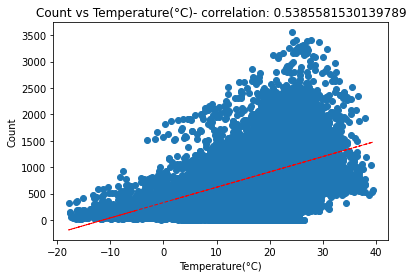

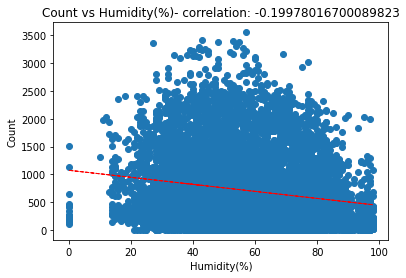

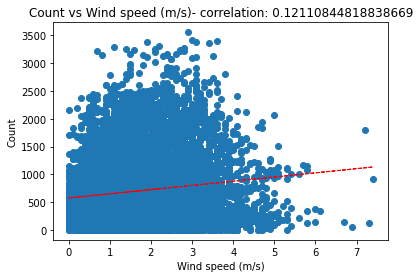

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure()
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Count')
    ax.set_title('Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset_num[[i for i in dataset_num.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour']]])

,variables,VIF
0,Temperature(°C),2.203089
1,Humidity(%),3.916245
2,Wind speed (m/s),3.399824


**Observation**

From the above analysis we can infer the following

* Temperature and Dew Point Temparature are highly collinear. Since Deew Point Temperature impacts the Rented Bike Count less than Temparture as seen in the heatmap, we can remove it.
* Hours doesn't have a standard graph compared to other numerical features. It affects the Rented Bike Count but it is not continious so it can be moved to categorical data for encoding.=


In [ ]:
#Updating the categorical features
dataset_cat[['Hour']] = dataset[['Hour']]
dataset_num.drop(['Hour'],axis=1,inplace=True)
dataset_num.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

numeric_features = dataset_num.columns
categorical_features = dataset_cat.columns

In [ ]:
dataset_num.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s)
0,15.937377,-5.2,37,1.163151
1,14.282857,-5.5,38,0.587787
2,13.152946,-6.0,39,0.693147
3,10.344080,-6.2,40,0.641854
4,8.831761,-6.0,36,1.193922


#**Analysis on Categorical Features**

In [ ]:
dataset_cat.head()

,Date,Seasons,Holiday,Functioning Day,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m),Hour
0,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,0
1,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,1
2,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,2
3,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,3
4,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,4


**Splitting date**

The date feature by itself does not give any information which can interpreted by the model. However, it can be split to give the month and year as separate features which can help the model observe whether certain months of certain years have a higher number of Rental Bikes hired 

In [ ]:
dataset_cat[['Day','Month','Year']] = dataset['Date'].str.split('/', expand=True)
categorical_features = dataset_cat.columns
dataset_cat.head()


,Date,Seasons,Holiday,Functioning Day,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m),Hour,Day,Month,Year
0,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,0,01,12,2017
1,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,1,01,12,2017
2,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,2,01,12,2017
3,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,3,01,12,2017
4,01/12/2017,Winter,No Holiday,Yes,0.0,0.0,0.0,2000,4,01,12,2017


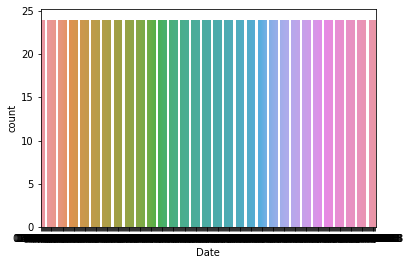

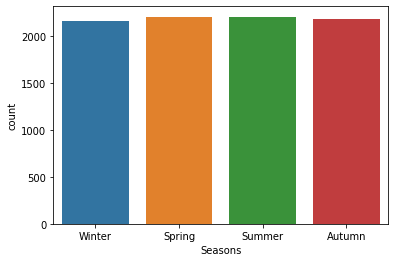

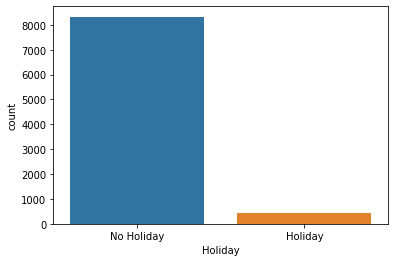

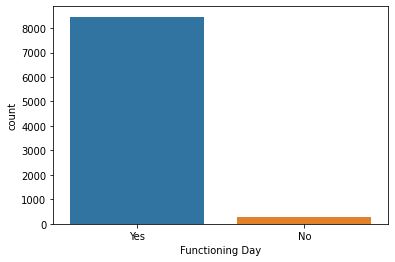

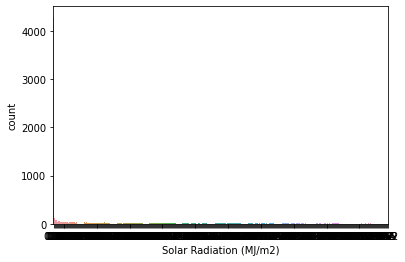

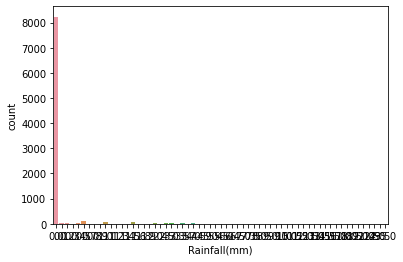

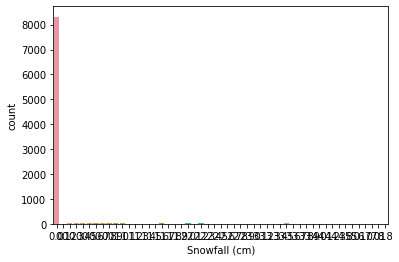

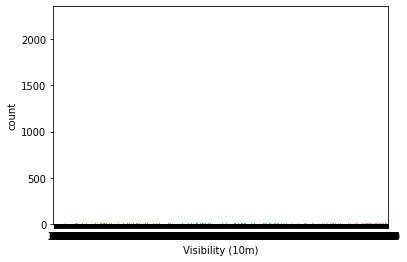

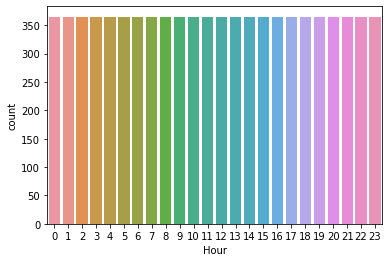

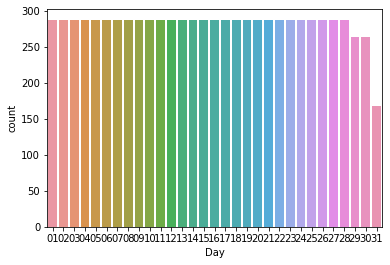

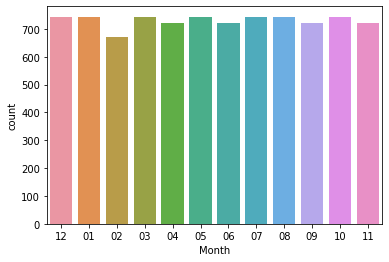

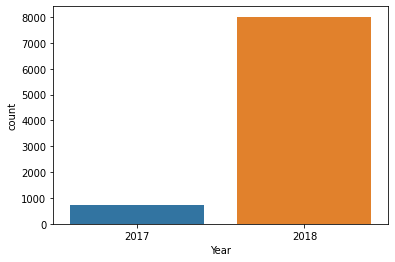

In [ ]:
i=0
for name in categorical_features:
    i=i+1
    sns.countplot(name,data=dataset_cat) 
    plt.show()
plt.show()

In [ ]:
sns.countplot(,data=dataset_cat) 
plt.show()

**Observations from bar graph**

* We can see that Day only gives day of the month. By itself, it does not give any data which cannot be derived from month, functioning day and holiday.
So we can drop it.

*  For rainfall, snowfall, solar radiation, visibilty we can convert them into binary features.


In [ ]:

dataset_cat['Snowfall (cm)']= dataset['Snowfall (cm)'].apply(lambda x : 0 if x == 0 else 1)
dataset_cat['Rainfall(mm)']= dataset['Rainfall(mm)'].apply(lambda x : 0 if x == 0 else 1)
dataset_cat['Solar Radiation (MJ/m2)']= dataset['Solar Radiation (MJ/m2)'].apply(lambda x : 0 if x == 0 else 1)
dataset_cat['Visibility (10m)']= dataset['Visibility (10m)'].apply(lambda x : 1 if x == 2000 else 0)
dataset_cat['Visibility (10m)'].value_counts()

0    6515
1    2245
Name: Visibility (10m), dtype: int64

In [ ]:
dataset_cat['Snowfall (cm)'].value_counts()


0    8317
1     443
Name: Snowfall (cm), dtype: int64

In [ ]:

dataset_cat['Solar Radiation (MJ/m2)'].value_counts()

1    4460
0    4300
Name: Solar Radiation (MJ/m2), dtype: int64

In [ ]:
dataset_cat['Rainfall(mm)'].value_counts()

0    8232
1     528
Name: Rainfall(mm), dtype: int64

In [ ]:
#dataset_cat.drop(['Date','Day'],axis=1,inplace=True)
categorical_features = dataset_cat.columns

dataset_cat.head()

,Seasons,Holiday,Functioning Day,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m),Hour,Month,Year
0,Winter,No Holiday,Yes,0,0,0,1,0,12,2017
1,Winter,No Holiday,Yes,0,0,0,1,1,12,2017
2,Winter,No Holiday,Yes,0,0,0,1,2,12,2017
3,Winter,No Holiday,Yes,0,0,0,1,3,12,2017
4,Winter,No Holiday,Yes,0,0,0,1,4,12,2017


**Observation**

Now all the features in dataset_cat are categorical.
We can one hot encode all of them so they can be used in the model.

#**Final Dataset creation**

In [ ]:
final_df=dataset_num
final_df=final_df.join(dataset_cat)
final_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Seasons,Holiday,Functioning Day,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Visibility (10m),Hour,Month,Year
0,15.937377,-5.2,37,1.163151,Winter,No Holiday,Yes,0,0,0,1,0,12,2017
1,14.282857,-5.5,38,0.587787,Winter,No Holiday,Yes,0,0,0,1,1,12,2017
2,13.152946,-6.0,39,0.693147,Winter,No Holiday,Yes,0,0,0,1,2,12,2017
3,10.344080,-6.2,40,0.641854,Winter,No Holiday,Yes,0,0,0,1,3,12,2017
4,8.831761,-6.0,36,1.193922,Winter,No Holiday,Yes,0,0,0,1,4,12,2017


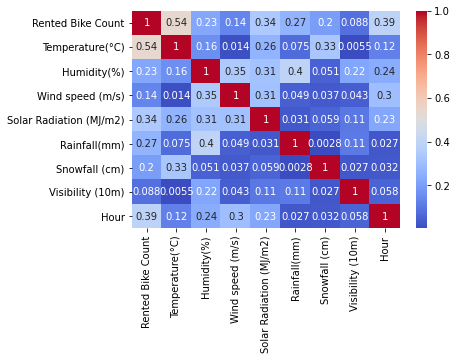

In [ ]:
#Checking for collinearity in the features
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
final_df = pd.get_dummies(final_df, columns=["Rainfall(mm)", "Snowfall (cm)","Seasons", "Holiday","Functioning Day","Hour"
, "Month","Year","Solar Radiation (MJ/m2)","Visibility (10m)"], prefix=["rain", "snow","season","Hol","Func","H","M","Y","Solar","Visi"])
#final_df = pd.get_dummies(final_df, columns=["Seasons", "Holiday","Functioning Day"], prefix=["s", "h","fday"])


In [ ]:
final_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),rain_0,rain_1,snow_0,snow_1,season_Autumn,season_Spring,season_Summer,season_Winter,Hol_Holiday,Hol_No Holiday,Func_No,Func_Yes,H_0,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,H_10,H_11,H_12,H_13,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22,H_23,M_01,M_02,M_03,M_04,M_05,M_06,M_07,M_08,M_09,M_10,M_11,M_12,Y_2017,Y_2018,Solar_0,Solar_1,Visi_0,Visi_1
0,15.937377,-5.2,37,1.163151,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
1,14.282857,-5.5,38,0.587787,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
2,13.152946,-6.0,39,0.693147,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
3,10.344080,-6.2,40,0.641854,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
4,8.831761,-6.0,36,1.193922,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1


In [ ]:
#Extract final features list
final_df.columns
features = [i for i in final_df.columns if i not in ['Rented Bike Count']]
type(features)
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'rain_0',
 'rain_1',
 'snow_0',
 'snow_1',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'Hol_Holiday',
 'Hol_No Holiday',
 'Func_No',
 'Func_Yes',
 'H_0',
 'H_1',
 'H_2',
 'H_3',
 'H_4',
 'H_5',
 'H_6',
 'H_7',
 'H_8',
 'H_9',
 'H_10',
 'H_11',
 'H_12',
 'H_13',
 'H_14',
 'H_15',
 'H_16',
 'H_17',
 'H_18',
 'H_19',
 'H_20',
 'H_21',
 'H_22',
 'H_23',
 'M_01',
 'M_02',
 'M_03',
 'M_04',
 'M_05',
 'M_06',
 'M_07',
 'M_08',
 'M_09',
 'M_10',
 'M_11',
 'M_12',
 'Y_2017',
 'Y_2018',
 'Solar_0',
 'Solar_1',
 'Visi_0',
 'Visi_1']

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = final_df[features].apply(zscore)

In [ ]:
y = (final_df['Rented Bike Count'])

In [ ]:
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)


(7008, 57)
(1752, 57)


#**Linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_train, y_train)

0.8042610422274945

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([18.33741233, 24.27686545, 22.97315451, ..., 20.82959983,
       33.73194358, 27.64600608])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)*(y_test), (y_pred)*(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 89085.89823771348
RMSE : 298.47260885668135


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)*(y_test), (y_pred)*(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)*(y_test), (y_pred)*(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7871419591312474
Adjusted R2 :  0.7799796755837156


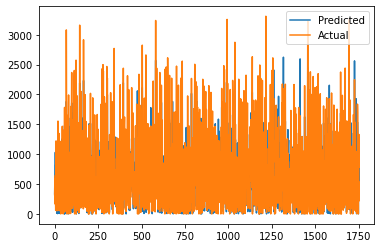

In [ ]:
plt.plot((y_pred)*(y_pred))
plt.plot(np.array((y_test)*(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Results of Linear regression**

The RMSE Score is 298.47, that relative to the scale of the output which was in 1000s is an impressive score.


#**Random forest regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfor_model=RandomForestRegressor()
rfor_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rfor_model.score(X_train,y_train)

0.9849270113606986

In [ ]:
y_pred_forest = rfor_model.predict(X_test)


In [ ]:
y_pred_forest

array([15.14443579, 21.37727433, 16.59158279, ..., 17.33041436,
       34.16036258, 27.55177904])

In [ ]:
MSE  = mean_squared_error((y_test)*(y_test), (y_pred_forest)*(y_pred_forest))
print("MSE :" , MSE)
RMSLE = mean_squared_log_error((y_test)*(y_test), (y_pred_forest)*(y_pred_forest))
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
print("RMSLE :" ,np.sqrt(RMSLE))

MSE : 58102.05712099773
RMSE : 241.0436830140913
RMSLE : 0.48371075953055187


**Random Forest Regression Results**

The RMSE obtained is 241.04